In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
TABLE_DIR = "tables"

In [2]:
# https://data.cso.ie/table/RIH02
rental_data = pd.read_csv(os.path.join(TABLE_DIR, "RIH02.20211118T121153.csv"))
rental_data = rental_data.loc[~rental_data["VALUE"].isnull()]
# Let's remove locations with missing data.
locations = list(rental_data["Location"])
location_data_points = list(({location: locations.count(location) for location in set(locations)}).items())
expected_data_points_per_location = max(location[1] for location in location_data_points)
study_locations = [data_point[0] for data_point in location_data_points if data_point[1] == expected_data_points_per_location]
rental_data = rental_data.loc[rental_data["Location"].isin(study_locations)]
year = rental_data["HalfYear"].str[0:4].astype(int)
half = (rental_data["HalfYear"].str[5:].astype(int) - 1) / 2
rental_data["Year"] = year + half
for col in ["Statistic", "Number of Bedrooms", "Property Type", "UNIT"]:
    rental_data.pop(col)
rental_data

,HalfYear,Location,VALUE,Year
0,2008H1,Carlow,759.62,2008.0
3,2008H1,"Tullow, Carlow",729.30,2008.0
4,2008H1,Cavan,583.96,2008.0
5,2008H1,Cavan Town,570.09,2008.0
8,2008H1,"Ballyjamesduff, Cavan",611.57,2008.0
...,...,...,...,...
12034,2021H1,"Baltinglass, Wicklow",942.46,2021.0
12035,2021H1,"Blessington, Wicklow",1424.29,2021.0
12036,2021H1,"Bray, Wicklow",1391.88,2021.0
12037,2021H1,"Delgany, Wicklow",1565.79,2021.0


<module 'matplotlib.pyplot' from '/usr/lib/python3.9/site-packages/matplotlib/pyplot.py'>

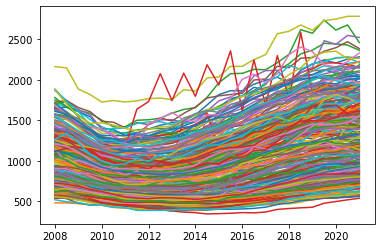

In [3]:
for location, df in study_data.groupby('Location'):
    plt.plot(df['Year'], df['VALUE'], label=location)
plt